# Escalabilidad: Red 3x3

### Librerias

In [1]:
from random import random
import networkx as nx
import numpy as np
import math as math
import matplotlib.pyplot as plt 
import pandas as pd
import datetime
from sympy import *

### Definimos la red

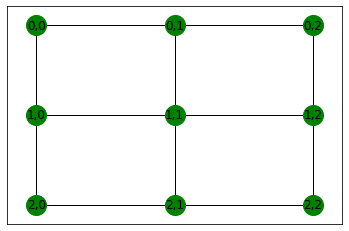

Graph with 9 nodes and 12 edges


In [2]:
Nodos=3

graph=nx.grid_2d_graph(Nodos, Nodos)
pos = {(x,y):(y,-x) for x,y in graph.nodes()}
labels = dict(((i, j), f"{i},{j}") for i, j in graph.nodes())
#graph.add_edge(0,0)
plt.close()
nx.draw_networkx(graph,
                pos=pos,
                labels=labels,
                node_size=400,
                node_color="green")
#plt.axis("off")
plt.show()
print(graph)

En cada uno de los lados de la red va situado un memristor, y entre los nodos 0,0 y 2,0 va situada la fuente de tension

In [3]:
#Numero de resistencias de la malla
N_res=12
N_res_lista=list(range(0,N_res))

### Defino el ciclo de tension

In [4]:
Vmax = 1000                    #Seteado asi en Rozenberg
s = 1000                       #Cantidad de time steps t que componen un ciclo de tension unitario
n_ciclos = 10                  #Cantidad de ciclos que componen el experimento
tau= n_ciclos*s                #Tiempo total del experimento
pol = 1                        #Polaridad de la corriente --> pol = 1 Primer ciclo positivo
                                                             #pol = -1 Primer ciclo negativo

In [5]:
#Ciclo de tension unitario
k = Vmax / (s/4)              #Pendiente de la rampa

t_ciclo_unitario = list(range(0,s))
V_unitario       = list(range(0,s))

for t in t_ciclo_unitario:
    if (0 <= t <s/4):
        V_unitario[t]= pol*(k*t)
    if (s/4 <= t <=s*3/4):
        V_unitario[t]= pol*(2*Vmax-k*t)
    if (s*3/4 < t <=s):
        V_unitario[t]= pol*(-4*Vmax+k*t)

#Ciclo de tension del experimento --> puede contener varios ciclos de tension unitarios
t_ciclo = list(range(0,tau))
V_total = list(range(0,0))

#if n_ciclos>1:
cont_ciclos=list(range(0,n_ciclos))
for k in cont_ciclos:
    V_total=V_total+V_unitario

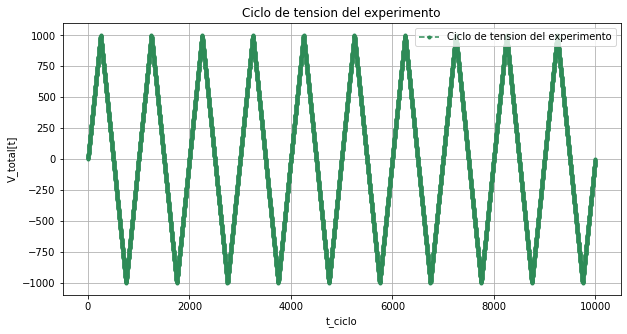

In [6]:
plt.rc('figure', figsize=(10, 5))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(t_ciclo, V_total, '.', linestyle='dashed', label='Ciclo de tension del experimento', color='seagreen')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('V_total[t]')
plt.title('Ciclo de tension del experimento')
plt.grid(True)
plt.show()

In [7]:
'''#Prueba con menor cantidad de pasos
tau=10
t_ciclo = list(range(0,tau))
V_total = list(range(0,tau))

V_total = (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000)
    
print(V_total)
print(t_ciclo)'''

'#Prueba con menor cantidad de pasos\ntau=10\nt_ciclo = list(range(0,tau))\nV_total = list(range(0,tau))\n\nV_total = (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000)\n    \nprint(V_total)\nprint(t_ciclo)'

### Definir memristor individual

Definimos la serie de parametros que caracterizan al memristor individual

In [8]:
NB = 10                       #Tamaño de la zona de contactos en el bulk 
NR = 1                        #Tamaño de la zona de contactos derecha
NL = 1                        #Tamaño de la zona de contactos izquierda
N=NL+NR+NB                    #Cantidad de bines total
N_lista = list(range(0,N))    #Variable Contador

d_inicial = 0.0001

AB = 1                       #Resistividad local zona central
AL = 1000                    #Resistividad local extremo izquierdo
AR = 1000                    #Resistividad local extremo derecho

VBAL= 16                       #Parametros - movilidad de vacancias en extremo izquierdo
VBAR= 16                       #Parametros - movilidad de vacancias en extremo derecho
VBB = 16                       #Parametros - movilidad de vacancias en la zona central

vb= list(range(0,N))            #Listado - movilidad de cada sitio i
di= list(range(0,N)) 
fdid=1                   #Factor de densidad inicial de vacancias extremo derecho
fdii=1                  #Factor de densidad inicial de vacancias extremo izquierdo

rho= list(range(0,N))         #Variable de resistividad local
Rho_total= list(range(0,N_res))
rho_sumatoria= 0    #Resistencia total


for i in N_lista:
    if i <= NL:
        vb[i]=VBAL
        di[i]=d_inicial*fdii
    elif i >=len(N_lista)-NR:
        vb[i]=VBAR
        di[i]=d_inicial*fdid
    else:
        vb[i]=VBB
        di[i]=d_inicial

### Matriz 1

Contiene N_res como numero de filas y N bines como numero de columnas. 

Almacena la densidad de vacancias en cada tiempo t de la simulacion, pero no guarda estados de tiempos anteriores

In [9]:
# Matriz de N (numero de bines) columnas y N_res (12) como filas
Matriz1 = [[0 for col in range(NB+NR+NL)] for row in range(N_res)]

#Primero, en el tiempo 0 todas los memristores van a tener la densidad inicial de vacancias 
for c in N_lista:
    for f in N_res_lista:
        Matriz1[f][c]=d_inicial

#print(Matriz1)

Estas lineas lo que hacen es calcular la resistencia total usando las densidades de la matriz. en este caso es la resistencia #1

In [10]:
for j in N_res_lista:
    for i in N_lista:
        if i < NR:
            rho[i]=(AL*Matriz1[j][i])
        elif i >=len(N_lista)-NR:
            rho[i]=(AR*Matriz1[j][i])
        else:
            rho[i]=(AB*Matriz1[j][i])
    #Resistencias totales
    rho_sumatoria=0
    for i in N_lista:
        rho_sumatoria=rho_sumatoria+rho[i]
    Rho_total[j]=rho_sumatoria
    #print(rho)
    
print(Rho_total) #Lista que tiene las resistencias totales 
#print(Rho_total[1]) #resistencia del memristor 1
#print(Rho_total[6]) #resistencia del memristor 6

[0.20100000000000004, 0.20100000000000004, 0.20100000000000004, 0.20100000000000004, 0.20100000000000004, 0.20100000000000004, 0.20100000000000004, 0.20100000000000004, 0.20100000000000004, 0.20100000000000004, 0.20100000000000004, 0.20100000000000004]


### Matriz 2

Contiene N_res como numero de filas y tau como numero de columnas.  
Almacena la resistencia total de cada memristor en todos los steps t de la simulacion

In [11]:
Matriz2 = [[0 for col in range(tau)] for row in range(N_res)]

#Para recorrer Matriz2, usamos N_res_lista y t_ciclo

In [12]:
#Ejemplo de prueba sobre como funciona navegar las matrices
Columnas=4
Filas=5

Columnas_lista= list(range(0,Columnas))
Filas_lista= list(range(0,Filas)) 

Matriz = [[0 for col in range(Columnas)] for row in range(Filas)]

print(Matriz)
print("")
i=0
for f in Filas_lista:
    for c in Columnas_lista:
        Matriz[f][c]=i+1
        i=i+1
        
print(Matriz)
print("")
print(Matriz[1][3])

#Matriz[0]=[9,9,9,9]
#print(Matriz)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16], [17, 18, 19, 20]]

8


### Cuerpo del codigo

Definimos variables auxiliares

In [13]:
delta = list(range(0,N))
piip1 = list(range(0,N))
pip1i = list(range(0,N))
piim1 = list(range(0,N))
pim1i = list(range(0,N))
deltap= list(range(0,N))
deltam= list(range(0,N))
rho   = list(range(0,N))

In [14]:
for t in t_ciclo:

    #En cada tiempo t, calculamos la resistencia total de cada memristor usando Matriz1 y lo guardamos en Matriz2
    for j in N_res_lista:
        for i in N_lista:
            if i < NL:
                rho[i]=(AL*Matriz1[j][i])
            elif i >=len(N_lista)-NR:
                rho[i]=(AR*Matriz1[j][i])
            else:
                rho[i]=(AB*Matriz1[j][i])

        #Resistencias totales
        rho_sumatoria=0
        for i in N_lista:
            rho_sumatoria=rho_sumatoria+rho[i]

        #Rho_total[j]=rho_sumatoria
        #Matriz2[j][t]=Rho_total[j]
        Matriz2[j][t]=rho_sumatoria
        #Aca usamos Matriz1 para calcular Rho_total en el tiempo t
        #Guardamos el estado resistivo del tiempo t en la matriz 2

    #Calculamos ahora la caida de tension en cada memristor usando la ley de Kirchhoff
    V=V_total[t]
    R1=Matriz2[0][t]
    R2=Matriz2[1][t]
    R3=Matriz2[2][t]
    R4=Matriz2[3][t]
    R5=Matriz2[4][t]
    R6=Matriz2[5][t]
    R7=Matriz2[6][t]
    R8=Matriz2[7][t]
    R9=Matriz2[8][t]
    R10=Matriz2[9][t]
    R11=Matriz2[10][t]
    R12=Matriz2[11][t]

    M = Matrix([[R3+R8, 	-R3, 0, 	-R8,	 0, 		V], 
                [-R3,	(R1+R2+R4+R6),	-R4,	-R6,	0,	0], 
                [0,	-R4,	R2+R4+R5+R7,	0,	-R7,		0],
                [-R8,	-R6,	0,	R6+R8+R9+R11,	-R9,	0],
                [0,	0,	-R7,	-R9,	R7+R9+R10+R12,		0]])
    M_rref = M.rref()
    Resolucion=M_rref[0]

    #Corrientes de la malla
    Corriente1=Resolucion[5]
    Corriente2=Resolucion[11]
    Corriente3=Resolucion[17]
    Corriente4=Resolucion[23]
    Corriente5=Resolucion[29]

    #Calculamos la caida de tension en cada resistencia --> ya tiene los signos correctos
    DeltaV= list(range(0,12))
    DeltaV[0]=R1*Corriente2
    DeltaV[1]=R2*Corriente3
    DeltaV[2]=R3*(Corriente1-Corriente2)
    DeltaV[3]=R4*(Corriente2-Corriente3)
    DeltaV[4]=R5*(Corriente3)
    DeltaV[5]=R6*(Corriente2-Corriente4)
    DeltaV[6]=R7*(Corriente3-Corriente5)
    DeltaV[7]=R8*(Corriente1-Corriente4)
    DeltaV[8]=R9*(Corriente4-Corriente5)
    DeltaV[9]=R10*(Corriente5)
    DeltaV[10]=R11*(Corriente4)
    DeltaV[11]=R12*(Corriente5)
    
    #print(Corriente1)
    #print(Corriente2)
    #print(Corriente3)
    #print(Corriente4)
    #print(Corriente5)
    #print(DeltaV)

    #Calculamos con la caida de tension de cada memristor y la Densidad de vacancias inicial, el nuevo estado del memristor
    for n in N_res_lista:
        
        di= Matriz1[n]     #Leemos la densidad de vacancias del memristor n ylo traemos a una variable local
        i_total= DeltaV[n]/Matriz2[n][t]
        
        for i in N_lista:
            if i < NL:
                rho[i]=(AL*Matriz1[n][i])
            elif i >=len(N_lista)-NR:
                rho[i]=(AR*Matriz1[n][i])
            else:
                rho[i]=(AB*Matriz1[n][i])

        #Calculo de las probabilidades de transicion entre sitios
        for i in N_lista:
            delta[i] = 0
            piip1[i] = 0
            pip1i[i] = 0
            piim1[i] = 0
            pim1i[i] = 0
            deltap[i]= 0
            deltam[i]= 0

        for i in N_lista:
            if (i==(N-1)):
                piip1[i]= 0
                pip1i[i]= 0
                piim1[i]= di[i]  *(1-di[i-1]) *math.exp(-vb[i]-i_total* rho[i]/2  )
                pim1i[i]= di[i-1]*(1-di[i])   *math.exp(-vb[i-1] +i_total* rho[i-1]/2)

                deltap[i] = piip1[i]-pip1i[i]
                deltam[i] = piim1[i]-pim1i[i]

                if (deltap[i]>0):
                    deltap[i]= min(deltap[i],di[i])
                else:
                    deltap[i]=-min(-deltap[i],1-di[i])

                if (deltam[i]>0):
                    deltam[i]= min(deltam[i],di[i],1-di[i-1])
                else:
                    deltam[i]=-min(-deltam[i],di[i-1],1-di[i])

                delta[i]=deltap[i]+deltam[i]

            #Condiciones de borde extremo izquierdo
            elif (i==0):
                #print(di[i+1])
                #print(di[i])
                #print(vb[i+1])
                #print(i_total)
                #print(rho[i])
                #print(rho[i+1])
                piip1[i]= di[i]  *(1-di[i+1]) *math.exp(-vb[i]+i_total*rho[i]/2)
                pip1i[i]= di[i+1]*(1-di[i])   *math.exp(-vb[i+1] -i_total* rho[i+1]/2)
                piim1[i]= 0
                pim1i[i]= 0

                deltap[i] = piip1[i]-pip1i[i]
                deltam[i] = piim1[i]-pim1i[i]

                if (deltap[i]>0):
                    deltap[i]= min(deltap[i],di[i],1-di[i+1])
                else:
                    deltap[i]=-min(-deltap[i],di[i+1],1-di[i])

                if (deltam[i]>0):
                    deltam[i]= min(deltam[i],di[i])
                else:
                    deltam[i]=-min(-deltam[i],1-di[i])

                delta[i]=deltap[i]+deltam[i]
                
            #Calculo en el bulk
            else:
                piip1[i]= di[i]  *(1-di[i+1]) *math.exp(-vb[i]   +i_total* rho[i]/2  )
                pip1i[i]= di[i+1]*(1-di[i])   *math.exp(-vb[i+1] -i_total* rho[i+1]/2)
                piim1[i]= di[i]  *(1-di[i-1]) *math.exp(-vb[i]   -i_total* rho[i]/2  )
                pim1i[i]= di[i-1]*(1-di[i])   *math.exp(-vb[i-1] +i_total* rho[i-1]/2)

            deltap[i] = piip1[i]-pip1i[i]
            deltam[i] = piim1[i]-pim1i[i]

            if (deltap[i]>0):
                deltap[i]= min(deltap[i],di[i],1-di[i+1])
            else:
                deltap[i]=-min(-deltap[i],di[i],1-di[i])

            if (deltam[i]>0):
                deltam[i]= min(deltam[i],di[i],1-di[i-1])
            else:
                deltam[i]=-min(-deltam[i],di[i-1],1-di[i])

            delta[i]=deltap[i]+deltam[i]

        #Se actualiza la densidad local de vacancias di(i)
        for i in N_lista:
            di[i]=di[i]-delta[i]
        Matriz1[n]=di  #Guardamos la nueva distribucion en la matriz1

OverflowError: math range error

***

### Graficos

In [ ]:
for i in N_res_lista:
    print(Matriz2[i][0])
    
len(Matriz1)


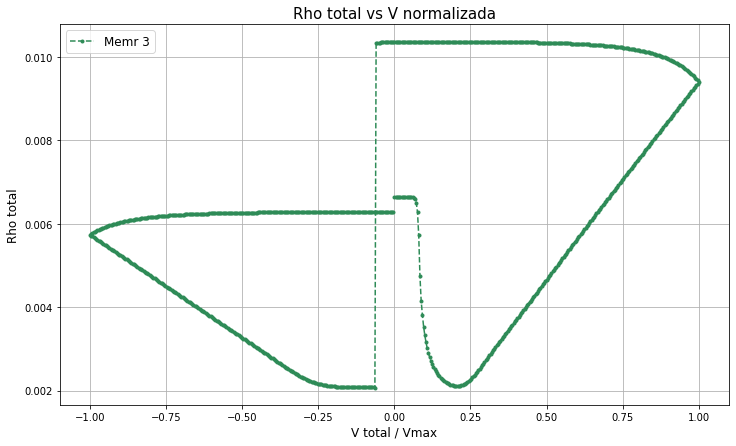

In [15]:
Mem_analizado=2

V_norm= list(range(0,tau))
for t in t_ciclo:
    V_norm[t]= V_total[t]/Vmax

    
plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(V_norm[4*s:5*s], Matriz2[Mem_analizado][4*s:5*s], '.', linestyle='dashed', label='Memr'+" "+ str(Mem_analizado+1), color='seagreen')
plt.legend()
plt.xlabel('V total / Vmax')
plt.ylabel('Rho total')
plt.title('Rho total vs V normalizada', fontsize=15)
plt.show()

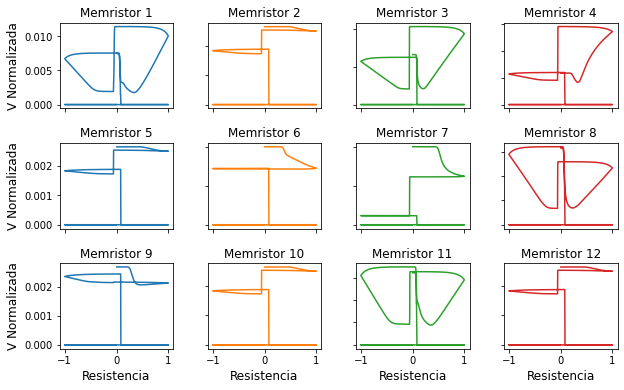

In [19]:
#Ciclo a partir del cual comienzo a graficar:
cic=4

fig, axs = plt.subplots(3, 4)
axs[0, 0].plot(V_norm[cic*s+1:], Matriz2[0][cic*s+1:])
axs[0, 0].set_title('Memristor 1')
axs[0, 1].plot(V_norm[cic*s+1:], Matriz2[1][cic*s+1:], 'tab:orange')
axs[0, 1].set_title('Memristor 2')
axs[0, 2].plot(V_norm[cic*s+1:], Matriz2[2][cic*s+1:], 'tab:green')
axs[0, 2].set_title('Memristor 3')
axs[0, 3].plot(V_norm[cic*s+1:], Matriz2[3][cic*s+1:], 'tab:red')
axs[0, 3].set_title('Memristor 4')
axs[1, 0].plot(V_norm[cic*s+1:], Matriz2[4][cic*s+1:], 'tab:blue')
axs[1, 0].set_title('Memristor 5')
axs[1, 1].plot(V_norm[cic*s+1:], Matriz2[5][cic*s+1:], 'tab:orange')
axs[1, 1].set_title('Memristor 6')
axs[1, 2].plot(V_norm[cic*s+1:], Matriz2[6][cic*s+1:], 'tab:green')
axs[1, 2].set_title('Memristor 7')
axs[1, 3].plot(V_norm[cic*s+1:], Matriz2[7][cic*s+1:], 'tab:red')
axs[1, 3].set_title('Memristor 8')
axs[2, 0].plot(V_norm[cic*s+1:], Matriz2[8][cic*s+1:], 'tab:blue')
axs[2, 0].set_title('Memristor 9')
axs[2, 1].plot(V_norm[cic*s+1:], Matriz2[9][cic*s+1:], 'tab:orange')
axs[2, 1].set_title('Memristor 10')
axs[2, 2].plot(V_norm[cic*s+1:], Matriz2[10][cic*s+1:], 'tab:green')
axs[2, 2].set_title('Memristor 11')
axs[2, 3].plot(V_norm[cic*s+1:], Matriz2[11][cic*s+1:], 'tab:red')
axs[2, 3].set_title('Memristor 12')

fig.subplots_adjust(hspace=0.4, wspace=0.3)

for ax in axs.flat:
    ax.set(xlabel='Resistencia', ylabel='V Normalizada')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

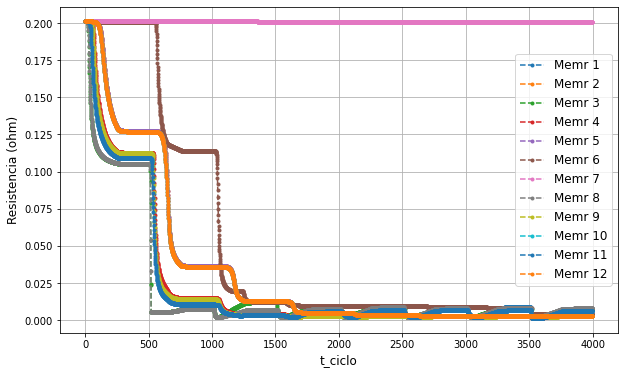

In [17]:
#p=2
#print(Matriz2[p])

plt.rc('figure', figsize=(10, 6))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)

for p in N_res_lista:
    plt.plot(t_ciclo[:4*s], Matriz2[p][:4*s],'.', linestyle='dashed', label='Memr'+" "+ str(p+1))  
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('Resistencia (ohm)')
plt.title('', fontsize=15)
plt.show()